In [1]:
## create SAX string representation & dimer features

# STEPS
# for each epoch:
# 1. normalize the data over a window (epoch size)
# 2. convert to PAA - take small segments & represent by the average over the segment
# 3. choose alphabet size & the levels/ threshold for discretisation
# 4. convert to string representation
# 5. vector representation - numbers of different dimers

# discretise over 0.25S = 0.25 * 100 = 25 points; reduces to 120 points
#               0.5s => 50 points; reduces to 60 points


## convert each epoch to sax dimer array, & then train with ML

import pandas as pd
import numpy as np
import os
import pickle
#import re
import regex as re
import matplotlib.pyplot as plt

In [2]:
### 1. normalise the data, 1 epoch (30s, i.e. 3000 data points) at a time ###
# if the SD is very small (less than a threshold), do not normalize the data

def z_norm(y):
    sd = y.std()
    if sd < 0.01:
        y = y
    else:
        y =(y - y.mean())/sd
    
    return y

In [3]:
#### 2. convert to PAA - take a window & represent by the average over the window ####
# discretise over 0.25S = 0.25 * 100 = 25 points  -> results in 120 data points
#               0.5s = 50 points   -> results in 60 data points

#time_window = 0.5

def get_paa(y, time_window):
    # convert time_window from sec to no. of data points
    time_window = time_window * 100  # 100 is sampling freq
    
    paa = []
    for i in range(0, int(len(y)/time_window)): # len(y)/time_window gives the no. of steps
        # take a segment of data
        arr = y[(i * int(time_window)):((i+1) * int(time_window))]
        # convert to mean & append to list
        paa.append(arr.mean())
    return paa

In [4]:
#### 3. choose alphabet size & the levels/ threshold for discretisation ####
# set this up as a dictionary to choose different alphabet sizes

# let alphabet size = 4;
# cuts: [-0.67, 0, 0.67]

In [5]:
#### 4. convert to string  ####

def get_sax_string(paa):
    sax = []
    
    for i in range(0,len(paa)):
        if paa[i] <= -0.67:
            alpha = 'a'
        elif (paa[i] > -0.67 and paa[i] <=0):
            alpha = 'b'
        elif (paa[i] > 0 and paa[i] <=0.67):
            alpha = 'c'
        else:
            alpha = 'd'
        sax.append(alpha)
    
    # convert sax from list to string format
    sax_string = ''.join(sax)
    return sax_string

In [6]:
#### 5. vector representation - numbers of different dimers ####

# different types of dimers
# aa ab ac ad
# ba bb bc bd
# ca cb cc cd
# da db dc dd

# ways to count:
# sax_string.count(dim_alpha[i]) => 'bbb' : counts bb as 1  => FIX THIS by adding overlapped=True
# len(re.findall(dim_alpha[i], sax_string)) : counts bb as 1

# set up a list of the dimers possible
dim_alpha = ['aa','ab','ac','ad','ba','bb','bc','bd','ca','cb','cc','cd','da','db','dc','dd']

def get_sax_dimer_array(sax_string):
    dim_arr = []
    
    for i in range(0, len(dim_alpha)):
        dim_arr.append(len(re.findall(dim_alpha[i], sax_string, overlapped=True)))
    
    print(dim_arr)
    ncols = 4
    im = np.reshape(dim_arr,(-1,ncols)) #x.reshape(1754, 1754)
    plt.gray()
    plt.imshow(im)

In [7]:
def run_all(y, time_window):
    y = z_norm(y)
    #time_window = 0.5
    paa = get_paa(y, time_window)
    sax_string = get_sax_string(paa)
    get_sax_dimer_array(sax_string)

In [8]:
file_location='C:\\Users\\Desktop\\data\\HEALTHCARE\\EEG\\data\\eeg_epochs_dec12_2018'
os.chdir('C:\\Users\\Desktop\\data\\HEALTHCARE\\EEG\\data\\eeg_epochs_dec12_2018')

x = pickle.load(open('SC4001E0-PSG-EEG.pickle','rb'))

[3, 1, 4, 1, 2, 9, 7, 3, 2, 9, 9, 2, 2, 1, 2, 2]


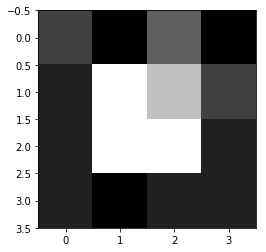

In [9]:
k = list(x['wake'].keys())
y = x['wake'][k[0]]
run_all(y, 0.5)

[3, 2, 3, 1, 2, 5, 8, 2, 3, 10, 7, 4, 1, 0, 6, 2]


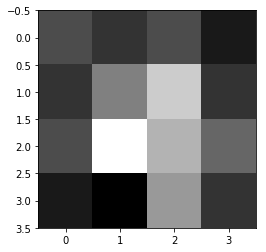

In [10]:
y = x['wake'][k[2]]
run_all(y, 0.5)

[1, 1, 0, 0, 0, 6, 14, 2, 0, 15, 15, 1, 1, 1, 1, 1]


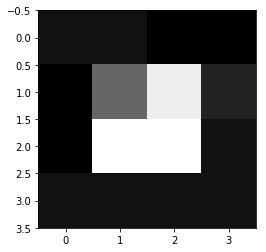

In [11]:
k = list(x['sleep_stage_1'].keys())
y = x['sleep_stage_1'][k[0]]
run_all(y,0.5)

[1, 1, 1, 1, 3, 15, 9, 1, 0, 10, 9, 2, 0, 3, 1, 1]


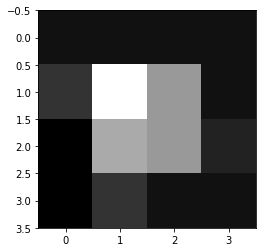

In [12]:
y = x['sleep_stage_1'][k[4]]
run_all(y,0.5)

[0, 0, 2, 0, 0, 12, 14, 0, 1, 12, 12, 3, 1, 1, 1, 0]


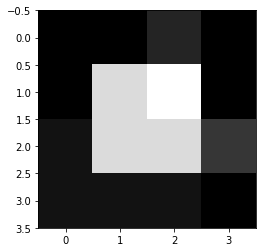

In [13]:
k = list(x['sleep_stage_2'].keys())
y = x['sleep_stage_2'][k[0]]
run_all(y,0.5)

[0, 2, 1, 0, 3, 7, 12, 4, 0, 13, 12, 0, 0, 3, 1, 1]


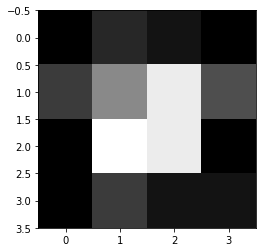

In [14]:
y = x['sleep_stage_2'][k[5]]
run_all(y,0.5)

[10, 4, 6, 1, 8, 19, 7, 4, 3, 12, 20, 7, 0, 2, 9, 7]


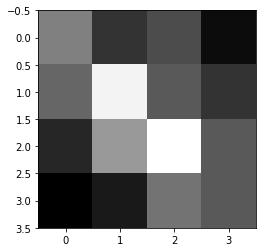

In [15]:
k = list(x['wake'].keys())
y = x['wake'][k[0]]
run_all(y, 0.25)

[11, 5, 4, 2, 6, 18, 10, 2, 2, 12, 13, 7, 3, 1, 7, 16]


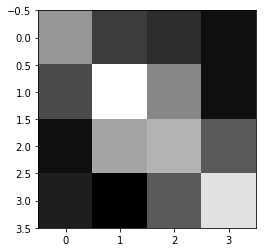

In [16]:
y = x['wake'][k[2]]
run_all(y, 0.25)

[2, 3, 4, 0, 5, 19, 19, 5, 2, 22, 24, 4, 1, 4, 4, 1]


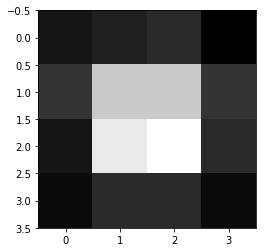

In [17]:
k = list(x['sleep_stage_1'].keys())
y = x['sleep_stage_1'][k[0]]
run_all(y,0.25)

[5, 7, 5, 2, 7, 13, 13, 6, 5, 13, 14, 7, 2, 5, 8, 6]


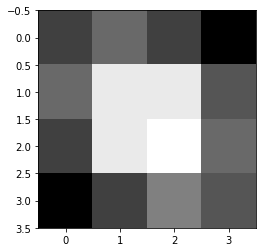

In [18]:
y = x['sleep_stage_1'][k[4]]
run_all(y,0.25)

[4, 5, 6, 4, 4, 18, 16, 4, 5, 18, 17, 4, 6, 1, 5, 2]


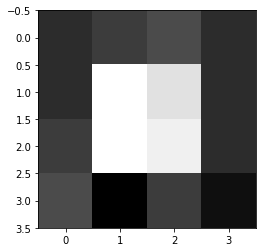

In [19]:
y = x['sleep_stage_2'][k[0]]
run_all(y,0.25)

[2, 6, 2, 5, 5, 14, 19, 4, 7, 20, 18, 3, 1, 3, 8, 2]


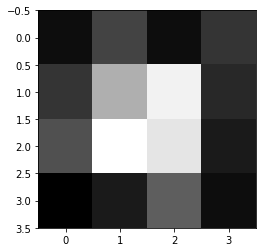

In [20]:
y = x['sleep_stage_2'][k[3]]
run_all(y,0.25)

In [2]:
file_location='C:\\Users\\Desktop\\data\\HEALTHCARE\\EEG\\data\\eeg_epochs_dec12_2018'
os.chdir('C:\\Users\\Desktop\\data\\HEALTHCARE\\EEG\\data\\eeg_epochs_dec12_2018')

In [3]:
x = pickle.load(open('SC4001E0-PSG-EEG.pickle','rb'))

k = list(x['wake'].keys())
x['wake'][k[0]]

array([ 5.01684982, -2.57875458,  1.35970696, ..., 41.58827839,
       28.08498168, 43.27619048])

In [4]:
len(x['wake'][k[0]])  ## 30s * 100 Hz sampling rate

3000

In [ ]:
# discretise over 0.25S = 0.25 * 100 = 25 points  -> results in 120 data points
#               0.5s = 50 points   -> results in 60 data points

# STEPS
# 1. normalize the data
# 2. convert to PAA - take a window & represent by the average over the window
# 3. choose alphabet size & the levels/ threshold for discretisation
# 4. convert to string representation
# 5. vector representation - numbers of different dimers

In [5]:
### normalise the data ###
# if the SD is very small (less than a threshold), do not normalize the data

(x['wake'][k[0]] - x['wake'][k[0]].mean())/x['wake'][k[0]].std()  
# use np.mean(x['wake'][k[0]]) or x['wake'][k[0]].mean() ; slly for SD

array([ 0.12672614, -0.08215885,  0.02615188, ...,  1.13246866,
        0.76111757,  1.17888754])

In [6]:
y = x['wake'][k[0]]
print(y)

[ 5.01684982 -2.57875458  1.35970696 ... 41.58827839 28.08498168
 43.27619048]


In [7]:
y = (y - y.mean())/y.std()
print(y)

[ 0.12672614 -0.08215885  0.02615188 ...  1.13246866  0.76111757
  1.17888754]


In [20]:
y[0:50]

array([ 0.12672614, -0.08215885,  0.02615188, -0.07700119, -0.154366  ,
       -0.21625785, -0.23946729, -0.20078489, -0.11310477, -0.03831879,
        0.04936133,  0.04420367,  0.03388837, -0.08473768, -0.03316114,
        0.02615188,  0.06741312, -0.07184354,  0.00294244,  0.14993558,
       -0.05894941, -0.09505298,  0.06741312,  0.20409095,  0.06999194,
       -0.03831879, -0.06410706, -0.19562724, -0.21883668, -0.1440507 ,
       -0.35809333, -0.26525556, -0.35035685, -0.23946729, -0.46124641,
       -0.59276659, -0.66239492, -0.59534542, -0.56697832, -0.66497374,
       -0.72944442, -0.71655028, -0.72944442, -0.74491738, -0.63918547,
       -0.62887017, -0.6030819 , -0.46898289, -0.45350993, -0.32456858])

In [21]:
y[50:100]

array([-0.32972624, -0.43545814, -0.43030049, -0.40966987, -0.46898289,
       -0.48187703, -0.36325099, -0.26009791, -0.18015427, -0.26009791,
       -0.21883668, -0.24720377, -0.16210248, -0.08473768, -0.06410706,
       -0.16983897, -0.17499662, -0.13115656, -0.15178718, -0.17499662,
       -0.1156836 , -0.03058231, -0.1156836 , -0.14920835, -0.09247416,
       -0.05379175, -0.05121292, -0.10021064, -0.02800348, -0.13115656,
       -0.11052595, -0.07958002, -0.020267  , -0.03573996, -0.0486341 ,
       -0.25494026, -0.29878031, -0.20852137, -0.18015427, -0.15694483,
       -0.15694483, -0.17757545, -0.04347644,  0.08804373,  0.06999194,
       -0.22657316, -0.74233855, -0.40709105, -1.36383585, -1.76613286])

In [22]:
y[49]

-0.32456858391397364

In [23]:
y[50]

-0.3297262378586891

In [24]:
y[51]

-0.43545814372535674

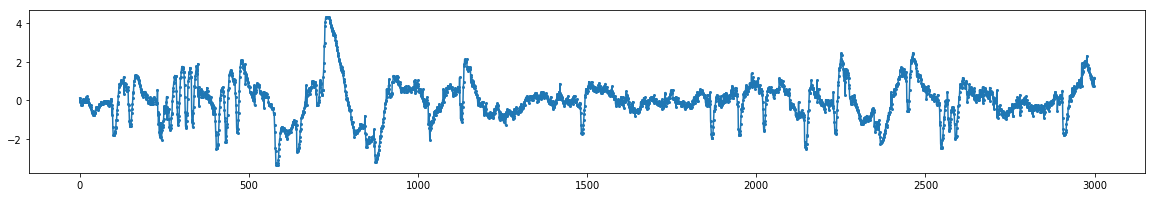

In [13]:
## plot the normalized data 
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(20,3))
plt.plot(y, marker='o', markersize=2)
plt.show()

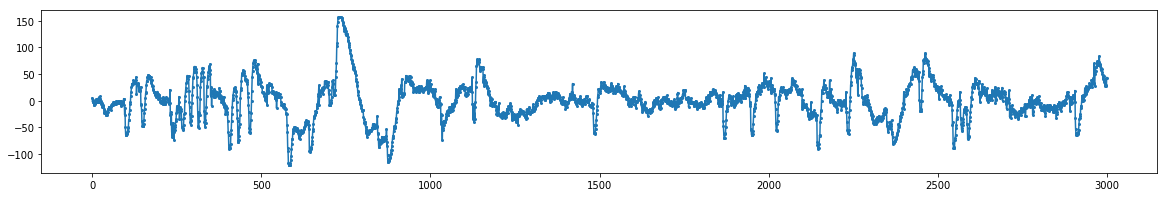

In [14]:
## plot the original data 
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(20,3))
plt.plot(x['wake'][k[0]], marker='o', markersize=2)
plt.show()

In [8]:
#### convert to PAA - take a window & represent by the average over the window ####
# discretise over 0.25S = 0.25 * 100 = 25 points  -> results in 120 data points
#               0.5s = 50 points   -> results in 60 data points

time_window = 0.5 * 100 # step size
print(len(y)/time_window)

paa = []
print(time_window)
print('')
for i in range(0, int(len(y)/time_window)):
    # take a segment of data
    arr = y[(i * int(time_window)):((i+1) * int(time_window))]
    # convert to mean & append to list
    paa.append(arr.mean())

print(paa)
len(paa)

60.0
50.0

[-0.2410661665490298, -0.24374814660028185, 0.04332687196258249, 0.4609936884056431, -0.5141639429217151, -0.19000539249634635, 0.6564171963709131, 0.14142544999107118, -0.4050279854515353, 0.8363161659625895, 0.39513044753162624, -1.2119429451022743, -1.6396156101980828, 0.07649058682710312, 2.353749533037335, 1.5004672644236035, -1.447286694599642, -2.1177301308732095, 0.6343424374875307, 0.629391089700604, -0.31729629185192476, 0.07272549944746082, 0.6956153663507508, 0.3720757343987479, -0.655947849861944, -0.6909683201465622, -0.007114983616735009, 0.1024851627084692, 0.015733423358354613, -0.3093535047770629, 0.6318667635940673, 0.24437222272759246, -0.20408578776541966, -0.13069237213211823, -0.025012042804897782, -0.06426178932418267, 0.1117689398089571, -0.37346314330987646, 0.1055797550752985, 0.31688883719029226, 0.24860149896225914, 0.5528515051610261, -0.8226432253551488, 0.10893223013936355, -0.13223966831553288, 0.7289853873730601, -0.8728271982372305, -1.3460

60

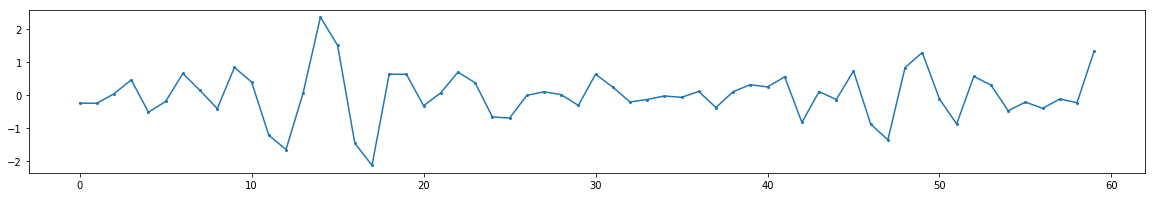

In [30]:
## plot the PAA data 
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(20,3))
plt.plot(paa, marker='o', markersize=2)
plt.show()

In [9]:
# 3. choose alphabet size & the levels/ threshold for discretisation
# let size = 4; cuts: [-0.67, 0, 0.67]


# convert to string
sax = []
for i in range(0,len(paa)):
    if paa[i] <= -0.67:
        alpha = 'a'
    elif (paa[i] > -0.67 and paa[i] <=0):
        alpha = 'b'
    elif (paa[i] > 0 and paa[i] <=0.67):
        alpha = 'c'
    else:
        alpha = 'd'
    sax.append(alpha)

In [32]:
print(sax)

['b', 'b', 'c', 'c', 'b', 'b', 'c', 'c', 'b', 'd', 'c', 'a', 'a', 'c', 'd', 'd', 'a', 'a', 'c', 'c', 'b', 'c', 'd', 'c', 'b', 'a', 'b', 'c', 'c', 'b', 'c', 'c', 'b', 'b', 'b', 'b', 'c', 'b', 'c', 'c', 'c', 'c', 'a', 'c', 'b', 'd', 'a', 'a', 'd', 'd', 'b', 'a', 'c', 'c', 'b', 'b', 'b', 'b', 'b', 'd']


In [34]:
print(str(sax))

['b', 'b', 'c', 'c', 'b', 'b', 'c', 'c', 'b', 'd', 'c', 'a', 'a', 'c', 'd', 'd', 'a', 'a', 'c', 'c', 'b', 'c', 'd', 'c', 'b', 'a', 'b', 'c', 'c', 'b', 'c', 'c', 'b', 'b', 'b', 'b', 'c', 'b', 'c', 'c', 'c', 'c', 'a', 'c', 'b', 'd', 'a', 'a', 'd', 'd', 'b', 'a', 'c', 'c', 'b', 'b', 'b', 'b', 'b', 'd']


In [35]:
''.join(sax)

'bbccbbccbdcaacddaaccbcdcbabccbccbbbbcbccccacbdaaddbaccbbbbbd'

In [33]:
len(sax)

60

In [10]:
# count different types of dimers
# aa ab ac ad
# ba bb bc bd
# ca cb cc cd
# da db dc dd

# convert sax from list to string format
sax_string = ''.join(sax)

# set up a list of the dimers possible
dim_alpha = ['aa','ab','ac','ad','ba','bb','bc','bd','ca','cb','cc','cd','da','db','dc','dd']

#from collections import Counter
#count = Counter(sax_string)

for i in range(0, len(dim_alpha)):
    print('Count of ' + dim_alpha[i] + ' is : ' + str(sax_string.count(dim_alpha[i])))  #str(count[dim_alpha[i]])) 


Count of aa is : 3
Count of ab is : 1
Count of ac is : 4
Count of ad is : 1
Count of ba is : 2
Count of bb is : 6
Count of bc is : 7
Count of bd is : 3
Count of ca is : 2
Count of cb is : 9
Count of cc is : 8
Count of cd is : 2
Count of da is : 2
Count of db is : 1
Count of dc is : 2
Count of dd is : 2


In [11]:
import re 

for i in range(0, len(dim_alpha)):
    print('Count of ' + dim_alpha[i] + ' is : ' + str(len(re.findall(dim_alpha[i], sax_string)) ))  #str(count[dim_alpha[i]])) 

Count of aa is : 3
Count of ab is : 1
Count of ac is : 4
Count of ad is : 1
Count of ba is : 2
Count of bb is : 6
Count of bc is : 7
Count of bd is : 3
Count of ca is : 2
Count of cb is : 9
Count of cc is : 8
Count of cd is : 2
Count of da is : 2
Count of db is : 1
Count of dc is : 2
Count of dd is : 2


In [11]:
import regex as re

#def count_overlapping(text, search_for):
#    return len(re.findall(search_for, text, overlapped=True))
for i in range(0, len(dim_alpha)):
    print('Count of ' + dim_alpha[i] + ' is : ' + str(len(re.findall(dim_alpha[i], sax_string, overlapped=True)) ))  #str(count[dim_alpha[i]])) 

Count of aa is : 3
Count of ab is : 1
Count of ac is : 4
Count of ad is : 1
Count of ba is : 2
Count of bb is : 9
Count of bc is : 7
Count of bd is : 3
Count of ca is : 2
Count of cb is : 9
Count of cc is : 9
Count of cd is : 2
Count of da is : 2
Count of db is : 1
Count of dc is : 2
Count of dd is : 2


In [15]:
import re
for i in range(0, len(dim_alpha)):
    print('Count of ' + dim_alpha[i] + ' is : ' + str(len(re.findall('?=dim_alpha[i]', sax_string)) ))  #str(count[dim_alpha[i]])) 

error: nothing to repeat at position 0

In [40]:
dim_arr = []

for i in range(0, len(dim_alpha)):
    dim_arr.append(len(re.findall(dim_alpha[i], sax_string)))  #str(count[dim_alpha[i]]))

ncols = 4
np.reshape(dim_arr,(-1,ncols))

array([[3, 1, 4, 1],
       [2, 6, 7, 3],
       [2, 9, 8, 2],
       [2, 1, 2, 2]])

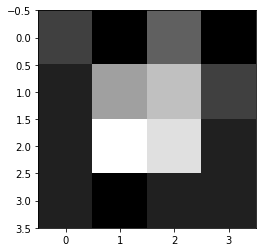

In [41]:
im = np.reshape(dim_arr,(-1,ncols)) #x.reshape(1754, 1754)
plt.gray()
plt.imshow(im)